In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

Load Dataset

Dataset avalaible on https://bit.ly/ImgClsKeras

In [2]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')


In [3]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (400, 100, 100, 3)
Shape of X_train: (400, 1)


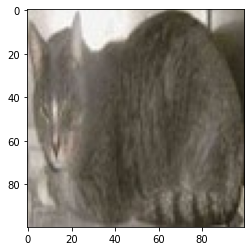

In [5]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

Model Building

In [6]:
model = Sequential([
    Conv2D(256,(2,2),activation = 'relu',input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPooling2D((4,4)),
    Conv2D(128,(1,1),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((4,4)),
    Conv2D(164,(1,1),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.6),
    Dense(1,activation='sigmoid')
])

In [7]:
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
63/63 [==============================] - 13s 113ms/step - loss: 0.7722 - accuracy: 0.5670 - val_loss: 0.6886 - val_accuracy: 0.5575
Epoch 2/30
63/63 [==============================] - 6s 99ms/step - loss: 0.6330 - accuracy: 0.6505 - val_loss: 0.8876 - val_accuracy: 0.5025
Epoch 3/30
63/63 [==============================] - 6s 98ms/step - loss: 0.6039 - accuracy: 0.6805 - val_loss: 0.8860 - val_accuracy: 0.5150
Epoch 4/30
63/63 [==============================] - 6s 99ms/step - loss: 0.5765 - accuracy: 0.6985 - val_loss: 1.0752 - val_accuracy: 0.5150
Epoch 5/30
63/63 [==============================] - 6s 101ms/step - loss: 0.5867 - accuracy: 0.7000 - val_loss: 1.0210 - val_accuracy: 0.5050
Epoch 6/30
63/63 [==============================] - 6s 100ms/step - loss: 0.5606 - accuracy: 0.7030 - val_loss: 0.7629 - val_accuracy: 0.5775
Epoch 7/30
63/63 [==============================] - 6s 98ms/step - loss: 0.5453 - accuracy: 0.7075 - val_loss: 0.7951 - val_accuracy: 0.6000
Epoch 8/3

In [9]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 37ms/step - loss: 0.6246 - accuracy: 0.7475


[0.6245847940444946, 0.7475000023841858]

Making Predictions

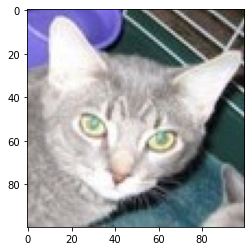

1/1 [==============================] - 0s 24ms/step
Our model says it is a cat


In [18]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred==1):
    pred = 'cat'
else:
    pred = 'dog'

print("Our model says it is a",pred)

In [11]:
score = model.evaluate(x_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.6245847940444946
Test accuracy:  0.7475000023841858


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 99, 99, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       32896     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
                                                        

In [13]:
val = model.fit(x_train,y_train, epochs=5,validation_data=(x_test,y_test),batch_size=200)

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Users\Akhil\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Akhil\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Akhil\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Akhil\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Akhil\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Akhil\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Akhil\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Akhil\AppData\Local\Temp/ipykernel_31104/2355418370.py", line 1, in <module>
      model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Akhil\anaconda3\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
OOM when allocating tensor with shape[200,256,99,99] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1268]

In [ ]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch')
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()